# Tarea#3_Cardenas_Venegas
            novimebre 28, 2022
 ##  Experimentos
Autores : David Càrdenas y Cristobal Venegas

# problema 1

El experimento en total durara un semestre, estará dividido en dos partes se realizara para un ramo este ramo debe ser uno con más de 60 alumnos , en la primera parte del semestre solo se tomara la asistencia de los estudiantes (para tomar la asistencia se utilizara un código QR que se tomara antes de ingresar a clase, no se puede ingresar sin marcar asistencia  ) y se hará el seguimiento de la asistencia de cada estudiante, para la segunda parte del semestre  a los estudiantes seleccionados se les dirá que la asistencia se registrara en el sistema con el objetivo de que al final de la asignatura se les otorgara un diploma con el porcentaje de su asistencia, el cual podrá utilizar como una forma de validar su responsabilidad y compromiso a la hora de postular a prácticas, empleos  becas etc. Los alumnos serán seleccionados aleatoriamente antes de iniciar el semestre utilizando un programa de python para asegurar la mayor aleatoriedad y se les avisara vía correo electrónico de los beneficios de la asistencia, el costo de este experimento está en la mantención de la base de datos ya que se deben pagar servidores para almacenar grandes volumenes de  informacion. 

Como supuestos tendremos:
1. Que  todos los alumnos de la universidad saben que para entrar a la clase deben registrarse con el codigo QR en caso de no hacerlo no podran entrar.


 El método más apropiado para la estimación es el pre-post test, ya que nos da la información en una cantidad aceptable de grupos, para Salomon es más costoso y difícil de implementar ya que se necesitaría 4 grupos y con este diseño de clase sería muy difícil de controlar además que llegarían a ser grupos muy pequeños mientras que únicamente post test sería más fácil de controlar, pero la información entregada seria escasa ya que no se podría tener la comparación previa para ambos grupos como saber si alguno de los grupos ya tenía una mayor asistencia que el otro, esto es útil para saber el efecto real del tratamiento. 

Primero se considerarán cursos de primer año que tengan clase a las 10 am, que tengan una cantidad similar de alumnos y que posean más de una sección. De todos estos cursos se escogerán 4 cursos de facultades distintas, una sección se controla y la otra se trata, pudiendo estos ser de cualquier facultad, siempre y cuando no requieran algún tipo de actividad de asistencia obligatoria, con estas características se busca obtener grupos similares y que la diferencia de facultad elimine la contaminación que pueda existir, el tratamiento será el mismo que el anterior, un diploma por la asistencia y los beneficios correspondientes. 

 A nivel de universidad se puede implementar separando por carreras donde a algunas carreras contara el beneficio de los diplomas y a otras no, las carreras que sean el control y las del tratamiento tienen que ser de similar cantidad por facultad para tener los grupos más similares posibles al realizar las comparaciones  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import linearmodels.panel as lmp
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
from scipy.stats import logistic
import seaborn as sns
import math

%matplotlib inline

# Problema 2

In [2]:

# experiment parameters
np.random.seed(1234) #set seed
nsize = 4000


# variance-covariance matrix (simetric)
cov = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])


X = norm.rvs(size=(3, nsize))
evals, evecs = eigh(cov)
c = np.dot(evecs, np.diag(np.sqrt(evals)))
Xa = np.dot(c, X)
Xa = Xa.transpose()
X = X.transpose()
X = pd.DataFrame(X)
Xa = pd.DataFrame(Xa)
Xc = pd.DataFrame(np.c_[X,Xa], columns=['X1','X2','X3','X4','X5','X6'])


#time periods and treatment asignment 
Xc['p'] = 1
Xc.loc[0:1999,'p'] = 0
tr = np.random.binomial(1, 0.5, size=2000) #treatment status
Xc.loc[0:1999,'T'] = tr
Xc.loc[2000:3999,'T'] = tr
#grouping variable
Xc["cl"]=1
for i in range(1,81):
    Xc.loc[(50*i):((50*(i+1))-1),"cl"]=i+1
for i in range (1,41):
    Xc["cl"].replace(40+i,i,inplace=True)

#outcome variable 
Xc['y']=  0.85*Xc["X1"]+((0.17+0.44)*Xc["T"]*Xc["p"])*Xc["X2"] + (-0.17*Xc["p"]*Xc["X3"])
# outcome variable [0-1]
Xc["y_5"]=norm.cdf(Xc["y"])
#data description
Xc.describe()

,X1,X2,X3,X4,X5,X6,p,T,cl,y,y_5
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000
mean,0.020920,0.016777,0.007038,-0.000491,-0.030140,0.007177,0.500000,0.504500,20.50000,0.015034,0.504722
std,0.984667,1.001594,1.001925,1.854542,2.339195,1.129158,0.500063,0.500042,11.54484,0.897280,0.269482
min,-3.880898,-3.599400,-3.858669,-7.306356,-8.147174,-3.856052,0.000000,0.000000,1.00000,-3.687356,0.000113
25%,-0.636544,-0.661161,-0.655832,-1.255264,-1.616897,-0.764421,0.000000,0.000000,10.75000,-0.569931,0.284362
50%,0.022275,0.015284,0.012476,0.010474,0.001375,0.002853,0.500000,1.000000,20.50000,0.007108,0.502836
75%,0.676830,0.704177,0.666984,1.248738,1.511504,0.759161,1.000000,1.000000,30.25000,0.601811,0.726350
max,3.220568,3.287788,3.037643,6.326073,8.273178,4.070917,1.000000,1.000000,40.00000,3.218499,0.999356


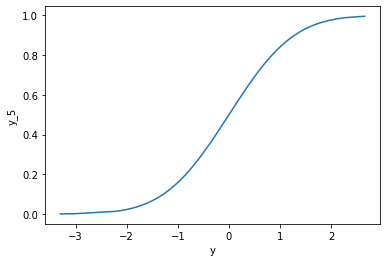

In [3]:
# plot the cdf
sns.lineplot(x=Xc.loc[(Xc["p"]==0),"y"], y=Xc.loc[(Xc["p"]==0),"y_5"])
plt.show()

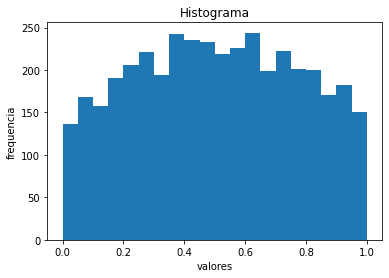

In [4]:
cuenta, cajas, ignorar = plt.hist(Xc["y_5"], 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

## Simulamos la data tal que se cumplan las condiciones solicitadas

i) Cada estudiante debe tener data de asistencia en un periodo, generando una variable binaria aleatoria talque la asistencia promedio a traves de todos los grupos es de 80%

ii) Genere un tratamiento que incrementa la participacion en el grupo de tratamiento en 10 puntos porcentuales.

iii) Ademas en la data posterior al experimento, asuma que la participacion promedio cayo a 75%.


In [5]:
#Aqui cumplimos los objetivos i , ii, iii planteados
Xc.loc[(Xc["y_5"] > 0.76) & (Xc["p"]==0)  ,"y_4"]=0 #20%
Xc.loc[(Xc["y_5"] <= 0.76) & (Xc["p"]==0)  ,"y_4"]=1 # 80%
Xc.loc[(Xc["y_5"] >= 0.91) & (Xc["p"]==1) & (Xc["T"]==1)  ,"y_4"]=0 #10%
Xc.loc[(Xc["y_5"] < 0.91) & (Xc["p"]==1) & (Xc["T"]==1) ,"y_4"]=1 #90%
Xc.loc[(Xc["y_5"] >= 0.73) & (Xc["p"]==1) & (Xc["T"]==0)  ,"y_4"]=0 #25%
Xc.loc[(Xc["y_5"] < 0.73) & (Xc["p"]==1) & (Xc["T"]==0) ,"y_4"]=1 #75%

## Verificamos el cumplimiento de los objetivos propuestas de la data simulada

Aqui podemos ver que claramente se cumplen los objetivos ya que cuando se esta en el periodo 0 antes del tratamiento se tiene que el valor esperado de la gente que asiste a clases es aproximadamente 80%.

Luego se tiene que para el periodo 1 las personas que estan en control , su valor esperado es de 75% de asistencia a clases.

Finalmente se tiene que para el periodo 1 las personas que fueron tratadas , su valor esperado es de 90% de asistencia a clases

In [6]:
#Verificamos el cumplimiento de los objetivos
Xc.groupby(by=["p","T"]).mean()

X1        X2        X3        X4        X5        X6         cl  \
p T                                                                            
0 0.0  0.001316  0.038858  0.036525  0.026133 -0.114016 -0.011146  20.764884   
  1.0  0.055697  0.003983 -0.025491 -0.038243  0.052112  0.036629  20.239841   
1 0.0  0.039905  0.038019  0.013752 -0.005582 -0.063604  0.016903  20.764884   
  1.0 -0.013247 -0.012980  0.004012  0.016113  0.002855 -0.013833  20.239841   

              y       y_5       y_4  
p T                                  
0 0.0  0.001118  0.499043  0.808274  
  1.0  0.047343  0.513869  0.791873  
1 0.0  0.031581  0.509605  0.752775  
  1.0 -0.019860  0.496357  0.897919

In [7]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis 
effect = 0.2
alpha = 0.05
power = 0.9

# perform power analysis 
analysis = TTestIndPower()
result = analysis.solve_power(effect, power = power, nobs1= None, ratio = 1.0, alpha = alpha)
print('Sample Size: %.3f' % round(result))


Sample Size: 526.000


In [8]:
#post-test
y = Xc.loc[0:1999,'y_4']
X = Xc.loc[0:1999,'T']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    y_4   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8401
Date:                Mon, 28 Nov 2022   Prob (F-statistic):              0.359
Time:                        21:29:30   Log-Likelihood:                -1004.9
No. Observations:                2000   AIC:                             2014.
Df Residuals:                    1998   BIC:                             2025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8083      0.013     63.593      0.0

In [9]:
model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())
mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.500192
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    y_4   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1998
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:               0.0004201
Time:                        21:29:30   Log-Likelihood:                -1000.4
converged:                       True   LL-Null:                       -1000.8
Covariance Type:            nonrobust   LLR p-value:                    0.3591
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4388      0.081     17.831      0.000       1.281       1.597
T             -0.1026      0.

In [10]:
print("el porcentaje de asistencia antes del test es para las personas en control :",100* logistic.cdf( 1.4388 , loc=0, scale=1),"%")
print("el porcentaje de asistencia antes del test es para las personas en tratamiento :",100* logistic.cdf( 1.4388 , loc=0, scale=1)- 0.0164*100,"%")

el porcentaje de asistencia antes del test es para las personas en control : 80.82687557787757 %
el porcentaje de asistencia antes del test es para las personas en tratamiento : 79.18687557787757 %


In [11]:
#post-test
y = Xc.loc[2000:3999,'y_4']
X = Xc.loc[2000:3999,'T']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    y_4   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     75.99
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           5.86e-18
Time:                        21:29:30   Log-Likelihood:                -860.69
No. Observations:                2000   AIC:                             1725.
Df Residuals:                    1998   BIC:                             1737.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7528      0.012     63.654      0.0

In [12]:
model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())
mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.443416
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    y_4   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1998
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                 0.04058
Time:                        21:29:30   Log-Likelihood:                -886.83
converged:                       True   LL-Null:                       -924.34
Covariance Type:            nonrobust   LLR p-value:                 4.643e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1135      0.074     15.121      0.000       0.969       1.258
T              1.0608      0.

In [13]:
print("el porcentaje de asistencia para las personas en control post-test es de :",100* logistic.cdf( 1.1135 , loc=0, scale=1),"%")
print("el porcentaje de asistencia para las personas en tratamiento post-test es de :",100* logistic.cdf( 1.1135 , loc=0, scale=1)+ 0.1469*100,"%")

el porcentaje de asistencia para las personas en control post-test es de : 75.27810436643087 %
el porcentaje de asistencia para las personas en tratamiento post-test es de : 89.96810436643086 %


In [14]:
#pre-post test
y=Xc['y_4']
Xc['dd']= Xc['p']*Xc['T']
X=Xc[['p','T','dd']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results2 = model.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    y_4   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     25.32
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.21e-16
Time:                        21:29:31   Log-Likelihood:                -1870.8
No. Observations:                4000   AIC:                             3750.
Df Residuals:                    3996   BIC:                             3775.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8083      0.012     65.842      0.0

In [15]:
model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())
mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.471804
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    y_4   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3996
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                 0.02084
Time:                        21:29:31   Log-Likelihood:                -1887.2
converged:                       True   LL-Null:                       -1927.4
Covariance Type:            nonrobust   LLR p-value:                 2.624e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4388      0.081     17.831      0.000       1.281       1.597
p             -0.3254      0.

In [16]:
print("el porcentaje de asistencia antes del test es para las personas en control:",100* logistic.cdf(1.4388  , loc=0, scale=1),"%")
print("el porcentaje de asistencia antes del test es para las personas en tratamiento:",100* logistic.cdf(1.4388  , loc=0, scale=1)-0.0153*100,"%")
print("el porcentaje de asistencia antes del test es para las personas en control:",100* logistic.cdf(1.4388  , loc=0, scale=1)-0.0485*100,"%")
print("el porcentaje de asistencia post-test  para las personas en control:",100* logistic.cdf(1.4388  , loc=0, scale=1)-0.0485*100-0.0153*100+0.1736*100,"%")

el porcentaje de asistencia antes del test es para las personas en control: 80.82687557787757 %
el porcentaje de asistencia antes del test es para las personas en tratamiento: 79.29687557787757 %
el porcentaje de asistencia antes del test es para las personas en control: 75.97687557787758 %
el porcentaje de asistencia post-test  para las personas en control: 91.80687557787758 %


In [17]:
#clustered standard errors
results3 = model.fit(cov_type="cluster", cov_kwds={'groups': Xc['cl']})
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.471804
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    y_4   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3996
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                 0.02084
Time:                        21:29:31   Log-Likelihood:                -1887.2
converged:                       True   LL-Null:                       -1927.4
Covariance Type:              cluster   LLR p-value:                 2.624e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4388      0.086     16.654      0.000       1.270       1.608
p             -0.3254      0.

# PROBLEMA 3

## Preparacion de la data y simulacion 

In [18]:
charls = pd.read_csv('charls.csv')
charls.dropna(inplace=True)
charls.reset_index(drop=True, inplace=True)
charls.describe()

,age,bnrps,cesd,child,dnrps,female,hrsusu,hsize,intmonth,married,nrps,retage,retired,schadj,urban,wave,wealth,inid
count,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000
mean,59.386553,59.610683,8.656878,2.825232,0.740889,0.521026,2.548166,3.585222,7.511143,0.907674,0.519078,1.280969,0.204942,4.162414,0.206652,1.909385,6.783959e+03,12747.082870
std,9.016106,51.905928,6.307677,1.372179,0.438157,0.499570,1.757182,1.720136,0.865851,0.289492,0.499648,3.830963,0.403669,3.540039,0.404914,0.817975,5.453065e+04,7769.025809
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.648450e+06,1.000000
25%,52.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,2.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+02,5176.000000
50%,59.000000,60.000000,7.000000,3.000000,1.000000,1.000000,3.401197,3.000000,7.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,2.000000,1.000000e+03,13314.000000
75%,65.000000,74.875404,12.000000,4.000000,1.000000,1.000000,4.025352,5.000000,8.000000,1.000000,1.000000,0.000000,0.000000,8.000000,0.000000,3.000000,6.800000e+03,19650.000000
max,95.000000,300.000000,30.000000,10.000000,1.000000,1.000000,5.123964,16.000000,12.000000,1.000000,1.000000,51.000000,1.000000,16.000000,1.000000,3.000000,1.040000e+06,25403.000000


 inid: identificador unico
- wave: periodo de la encuesta (1-3)
- cesd: puntaje en la escala de salud mental (0-30)
- child: numero de hijos
- drinkly: bebio alcohol en el ultimo mes (binario)
- hrsusu: horas promedio trabajo semanal
- hsize: tamano del hogar
- intmonth: mes en que fue encuestado/a (1-12)
- married: si esta casado/a (binario)
- retired: si esta pensionado/a (binario)
- schadj: años de escolaridad
- urban: zona urbana (binario)
- wealth: riqueza neta (miles RMB)
- age: edad al entrar a la encuesta (no varia entre periodos)
- bnrps: monto de pension publica (en RMB/mes)
- dnrps: pension implementada en la provincia (binaria)
- retage: fecha esperada de retiro (años desde la fecha de encuenta)
- female: genero del encuestado
- nrps: recibe pension publica

Preparando la data que no esta balanceada, sin embargo no es exagerado por lo cual no influye en los calculos

In [19]:
## Todos los individuos con mas de 2 hijos son parte de la intervencion
#charls.loc[(charls.wave.isin([3])) & (charls.child>2),"tr"]=1
charls.loc[(charls.child>2),"tr"]=1
charls["tr"].fillna(0, inplace = True)

In [20]:
charls = charls.loc[charls.drinkly != ".m", :].copy()
charls.reset_index(drop=True,inplace=True)

In [21]:
charls["drinkly"]=pd.to_numeric(charls['drinkly']).astype(int)

In [22]:
##Visualizamos si drinkly esta en formato int o object
charls.dtypes

age           int64
bnrps       float64
cesd        float64
child         int64
dnrps         int64
drinkly       int32
female        int64
hrsusu      float64
hsize         int64
intmonth      int64
married       int64
nrps          int64
retage        int64
retired       int64
schadj        int64
urban         int64
wave          int64
wealth      float64
inid          int64
tr          float64
dtype: object

In [23]:
df = charls.copy()

In [24]:
## df_1 es una dataframe que tiene solo a los del grupo 3 y mas de 2 hijos , ademas agreamos la columna index
df_1 = df.loc[(df.wave.isin([3])) & (df.child>2),"drinkly"].reset_index(drop=False)

In [25]:
df.reset_index(drop=False,inplace=True)

In [26]:
df_1.groupby(by=["drinkly"]).count()

,index
drinkly,
0,2174
1,1062


Observarciones


PANEL NO BALANCEADO

  1.  Declaran no beber alcohol 2174
  2. Declaran beber alcohol 1062
  3. Declaran beber alcohol post test 531.0
    

In [27]:
df_1["sdrinkly_1"]=np.random.binomial(1, 531/(1062+2174), size=3236)

In [28]:
df_1.groupby(by=["sdrinkly_1"]).count()

,index,drinkly
sdrinkly_1,,
0,2686,2686
1,550,550


In [29]:
## Aqui unimos las tablas df y df_1 
df_final = pd.merge(df,df_1,how="left",on=["index","drinkly"])
df_test1 = pd.merge(df,df_1,how="inner",on=["index","drinkly"])

In [30]:
df_final_confirmando =(df_final["drinkly"]==df_final["sdrinkly_1"]).reset_index(drop=False)
df_test1_confirmando = (df_test1["drinkly"]==df_test1["sdrinkly_1"]).reset_index(drop=False)
print(df_final_confirmando.groupby(0).count() ,  df_test1_confirmando.groupby(0).count())

       index
0           
False  19008
True    2030        index
0           
False   1206
True    2030


In [31]:
## Aqui nos damos cuenta que sdrinkly_1 tiene muchos null por lo que hay que rellenar
df_final.isnull().sum().sort_values(ascending=False)

sdrinkly_1    17802
age               0
tr                0
inid              0
wealth            0
wave              0
urban             0
schadj            0
retired           0
retage            0
nrps              0
index             0
intmonth          0
hsize             0
hrsusu            0
female            0
drinkly           0
dnrps             0
child             0
cesd              0
bnrps             0
married           0
dtype: int64

In [32]:
## Aqui observamos que ene el grupo 3 tambien hay null y son los que tienen 2 hijos o menos
df_final.loc[df.wave==3].isnull().sum().sort_values(ascending=False)

sdrinkly_1    2935
age              0
tr               0
inid             0
wealth           0
wave             0
urban            0
schadj           0
retired          0
retage           0
nrps             0
index            0
intmonth         0
hsize            0
hrsusu           0
female           0
drinkly          0
dnrps            0
child            0
cesd             0
bnrps            0
married          0
dtype: int64

In [33]:
df_final.loc[(df_final.child<=2) | (df_final.wave != 3) ,"sdrinkly_1"]=df_final.loc[(df_final.child<=2) | (df_final.wave != 3),"drinkly"]

In [34]:
## Aqui nos aseguramos de que se haya echo lo que se solicita correctamente
df_final_confirmando_1 =(df_final["drinkly"]==df_final["sdrinkly_1"]).reset_index(drop=False)
df_test1_confirmando_1 = (df_test1["drinkly"]==df_test1["sdrinkly_1"]).reset_index(drop=False)
print(df_final_confirmando_1.groupby(0).count() ,  df_test1_confirmando_1.groupby(0).count())

       index
0           
False   1206
True   19832        index
0           
False   1206
True    2030


## Natural experiment

Simule un experimento natural (e.g. intervencion de politica publica) tal que se reduce la proporcion de individuos con 3 hijos o mas que declaran beber alcohol en el tercer periodo a la mitad. Para ello, genere una variable de tratamiento (todos los individuos con mas de 2 hijos son parte de la intervencion), y una nueva variable llamada sdrinlky, talque es identica a drinkly en los periodos 1 y 2 , pero sustituya los valores aleatoriamente en el periodo 3 para generar el efecto esperado

tr es el tratamiento 

In [35]:
Xa=df_final[['married','female','age','hsize','nrps',"tr","retired"]]
ya=df_final['sdrinkly_1']
Xa = sm.add_constant(Xa)

model = sm.OLS(ya, Xa)
results = model.fit(cov_type="HC1")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             sdrinkly_1   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     611.4
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:29:31   Log-Likelihood:                -11684.
No. Observations:               21038   AIC:                         2.338e+04
Df Residuals:                   21030   BIC:                         2.345e+04
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6860      0.028     24.737      0.0

En conjunto , el tratamiento reduce la probabilidad de que la persona beba alcohol en 5.95 puntos porcentaules

## Diferenecias en diferencias periodos 2 y 3

In [36]:
df_diff = df_final.loc[df_final.wave != 1].copy()
df_diff.loc[df_diff.wave==3,"p"]=1
df_diff.fillna(0,inplace=True)
df_diff.reset_index(drop=False,inplace=True)

In [37]:
## Panel no balanceado sin embargo es minimo por lo que no afecta en los resultados
df_diff.groupby(by="wave").count()

,level_0,index,age,bnrps,cesd,child,dnrps,drinkly,female,hrsusu,...,nrps,retage,retired,schadj,urban,wealth,inid,tr,sdrinkly_1,p
wave,,,,,,,,,,,,,,,,,,,,,
2,6787,6787,6787,6787,6787,6787,6787,6787,6787,6787,...,6787,6787,6787,6787,6787,6787,6787,6787,6787,6787
3,6171,6171,6171,6171,6171,6171,6171,6171,6171,6171,...,6171,6171,6171,6171,6171,6171,6171,6171,6171,6171


In [38]:
## Corremos el modelo para identificar coeficientes
ye = df_diff['sdrinkly_1']
df_diff["tc"]=df_diff["tr"]*df_diff["p"]
Xe = df_diff[['tr','p',"tc"]]
Xe = sm.add_constant(Xe)
model = sm.OLS(ye, Xe)
results = model.fit(cov_type="HC1")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             sdrinkly_1   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     165.8
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          1.87e-105
Time:                        21:29:31   Log-Likelihood:                -8113.9
No. Observations:               12958   AIC:                         1.624e+04
Df Residuals:                   12954   BIC:                         1.627e+04
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3660      0.009     42.713      0.0

- La variación en el tiempo del grupo control es 0.04 (no significativo) y la variación en el grupo de tratamiento es la esperada (por diseño) , se puede apreciar que el efecto del tratamiento es significativamente diferente de 0.


- El efecto promedio del tratamiento de -0.152887  es una caída de  aproximadamente 15 puntos porcentuales (aproximado al 50% de reducción que se genero con el tratamiento artificial).

In [39]:
df_diff[['drinkly', 'sdrinkly_1',"p","tr","wave"]].groupby(by=["p","tr","wave"]).mean()

drinkly  sdrinkly_1
p   tr  wave                      
0.0 0.0 2     0.366023    0.366023
    1.0 2     0.313293    0.313293
1.0 0.0 3     0.370017    0.370017
    1.0 3     0.328183    0.169963

Diff-diff =  (Treat_1 – Treat_0) – (Control_1 – Control_0)

In [40]:
## Efecto diferencias diferencias
tr1_tr0 =(0.163782-0.313293)
control1_control0= (0.370017-0.366023)          
efecto_2=(0.164400-0.313293)-(0.370017-0.366023)
contrafactual =(0.313293) + (0.370017-0.366023)
print("Tratamiento:",tr1_tr0,"\n","Control:",control1_control0,"\n","efecto del tratamiento promedio:",efecto_2,"\n", "contrafactual:",contrafactual)

Tratamiento: -0.14951099999999998 
 Control: 0.0039939999999999976 
 efecto del tratamiento promedio: -0.152887 
 contrafactual: 0.317287


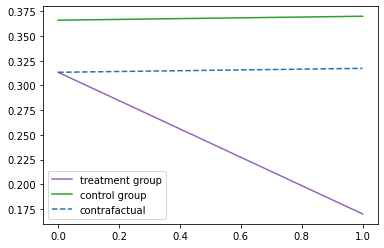

In [41]:
treatment = [0.313293,0.169963]
control=[0.366023,0.370017]
periodo=[0,1]
contrafactual=[0.313293,0.317287]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(periodo, treatment, color = 'tab:purple',label = 'treatment group')
ax.plot(periodo, control, color = 'tab:green',label = 'control group')
ax.plot(periodo, contrafactual, linestyle = 'dashed',label = 'contrafactual')
ax.legend(loc = 'best')
plt.show()

## Grupos pseudo-equivalentes

Compare el efecto del tratamiento generando grupos pseudo-equivalentes, en particular entre individuos solo con 3 hijos (tratamiento) y 2 hijos (control).

Compare estos dos grupos utilizando periodo 2 y periodo 3


In [42]:
df_diff.loc[df_diff.child==3,"T"]=1
df_diff.loc[df_diff.child==2,"T"]=0

In [43]:
df_diff_sna=df_diff.copy()

In [44]:
df_diff_sna.dropna(inplace=True)

In [45]:
df_diff_sna.groupby(by="child").count()

,level_0,index,age,bnrps,cesd,dnrps,drinkly,female,hrsusu,hsize,...,schadj,urban,wave,wealth,inid,tr,sdrinkly_1,p,tc,T
child,,,,,,,,,,,,,,,,,,,,,
2,4714,4714,4714,4714,4714,4714,4714,4714,4714,4714,...,4714,4714,4714,4714,4714,4714,4714,4714,4714,4714
3,3510,3510,3510,3510,3510,3510,3510,3510,3510,3510,...,3510,3510,3510,3510,3510,3510,3510,3510,3510,3510


In [46]:
ye = df_diff_sna['sdrinkly_1']
df_diff_sna["tc"]=df_diff_sna["T"]*df_diff_sna["p"]
Xe = df_diff_sna[['T','p',"tc"]]
Xe = sm.add_constant(Xe)
model = sm.OLS(ye, Xe)
results = model.fit(cov_type="HC1")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             sdrinkly_1   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     99.41
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.34e-63
Time:                        21:29:32   Log-Likelihood:                -5271.2
No. Observations:                8224   AIC:                         1.055e+04
Df Residuals:                    8220   BIC:                         1.058e+04
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3637      0.010     36.627      0.0

- La variación en el tiempo del grupo control es 0.0057 (no significativo) y se puede apreciar que el efecto del tratamiento es significativamente diferente de 0.

In [47]:
df_diff_sna[['drinkly', 'sdrinkly_1',"p","tr","wave"]].groupby(by=["p","tr","wave"]).mean()

drinkly  sdrinkly_1
p   tr  wave                      
0.0 0.0 2     0.363714    0.363714
    1.0 2     0.330011    0.330011
1.0 0.0 3     0.369400    0.369400
    1.0 3     0.345657    0.170775

Diff-diff =  (Treat_1 – Treat_0) – (Control_1 – Control_0)

In [48]:
## Efecto diferencias diferencias
tr1_tr0 =(0.170775-0.369400)
control1_control0= (0.330011-0.363714)          
efecto_2=(0.170775-0.369400)-(0.330011-0.363714)
print("Tratamiento:",tr1_tr0,"\n","Control:",control1_control0,"\n","efecto del tratamiento:",efecto_2)

Tratamiento: -0.198625 
 Control: -0.03370299999999998 
 efecto del tratamiento: -0.164922


## Utilizando variable married como instrumento

Estime el efecto anterior usando la variable married como instrumento para determinar el efecto del tratamiento en la pregunta 12. Como se interpreta el efecto en este caso? 

Utilice la variable married , tomando como periodo el 2 y el 3 es correcto?

In [49]:
ye = df_diff['married']
df_diff["tc"]=df_diff["tr"]*df_diff["p"]
Xe = df_diff[['tr','p',"tc"]]
Xe = sm.add_constant(Xe)
model = sm.OLS(ye, Xe)
results = model.fit(cov_type="HC1")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                married   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     378.6
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          9.92e-236
Time:                        21:29:32   Log-Likelihood:                -509.03
No. Observations:               12958   AIC:                             1026.
Df Residuals:                   12954   BIC:                             1056.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8924      0.006    161.923      0.0

- La variación en el tiempo del grupo control es de 0.1076 (significativo) y se puede apreciar que el efecto del tratamiento es significativamente diferente de 0.

- El efecto promedio del tratamiento de 0.03229  es un aumento de  aproximadamente 3.2 puntos porcentuales 

In [50]:
df_diff_sna[['drinkly', 'sdrinkly_1',"p","tr","wave","married"]].groupby(by=["p","tr","wave"]).mean()

drinkly  sdrinkly_1   married
p   tr  wave                                
0.0 0.0 2     0.363714    0.363714  0.923765
    1.0 2     0.330011    0.330011  0.891473
1.0 0.0 3     0.369400    0.369400  1.000000
    1.0 3     0.345657    0.170775  1.000000

In [51]:
## Efecto diferencias diferencias
tr1_tr0 =(1-1)
control1_control0= (0.891473-0.923765)          
efecto_2=(1-1)-(0.891473-0.923765)
print("Tratamiento:",tr1_tr0,"\n","Control:",control1_control0,"\n","efecto del tratamiento:",efecto_2)

Tratamiento: 0 
 Control: -0.03229199999999999 
 efecto del tratamiento: 0.03229199999999999


In [52]:
## Con ese codigo balanceamos la data sin embargo no es necesario para esta tarea balancearla.
##charls_balance = charls.groupby(by="inid").filter(lambda x: len(set(x['wave'])) == 3)

## Preparacion de la data para pregunta 15

In [53]:
#Intervencion se implementa en todos los individuos
charls["tdrinkly"]=1

In [54]:
df_intervencion = charls.copy()

In [55]:
df_intervencion_1 = df.loc[(df.wave.isin([3])),"drinkly"].reset_index(drop=False)

In [56]:
df_intervencion.reset_index(drop=False,inplace=True)

In [57]:
df_intervencion_1.groupby(by=["drinkly"]).count()

,index
drinkly,
0,4023
1,2148


### Observacion
1. Declaran no beber alcohol 4023
2. Declaraban beber alcohol 2148
3. el OBjetivo es que  el efecto es una reduccion de 50% en la prevalencia de consumo de alcohol ( pasar de 2148 a 1074)

In [58]:
df_intervencion_1["sdrinkly_1"]=np.random.binomial(1, 1074/(6171), size=6171)

In [59]:
df_intervencion_1.groupby(by=["drinkly","sdrinkly_1"]).count()

index
drinkly sdrinkly_1       
0       0            3327
        1             696
1       0            1780
        1             368

In [60]:
## Aqui unimos las tablas df y df_1 
df_intervencion_final = pd.merge(df_intervencion,df_intervencion_1,how="left",on=["index","drinkly"])
df_intervencion_test1 = pd.merge(df_intervencion,df_intervencion_1,how="inner",on=["index","drinkly"])

In [61]:
df_intervencion_final_confirmando =(df_intervencion_final["drinkly"]==df_intervencion_final["sdrinkly_1"]).reset_index(drop=False)
df_intervencion_test1_confirmando = (df_intervencion_test1["drinkly"]==df_intervencion_test1["sdrinkly_1"]).reset_index(drop=False)
print(df_intervencion_final_confirmando.groupby(0).count() ,  df_intervencion_test1_confirmando.groupby(0).count())

       index
0           
False  17343
True    3695        index
0           
False   2476
True    3695


In [62]:
df_intervencion_final.isnull().sum().sort_values(ascending=False)

sdrinkly_1    14867
nrps              0
tdrinkly          0
tr                0
inid              0
wealth            0
wave              0
urban             0
schadj            0
retired           0
retage            0
index             0
age               0
intmonth          0
hsize             0
hrsusu            0
female            0
drinkly           0
dnrps             0
child             0
cesd              0
bnrps             0
married           0
dtype: int64

In [63]:
## Aqui observamos que ene el grupo 3 tambien hay null y son los que tienen 2 hijos o menos
df_intervencion_final.loc[df.wave==3].isnull().sum().sort_values(ascending=False)

index         0
nrps          0
tdrinkly      0
tr            0
inid          0
wealth        0
wave          0
urban         0
schadj        0
retired       0
retage        0
married       0
age           0
intmonth      0
hsize         0
hrsusu        0
female        0
drinkly       0
dnrps         0
child         0
cesd          0
bnrps         0
sdrinkly_1    0
dtype: int64

In [64]:
df_intervencion_final.loc[(df_intervencion_final.wave != 3) ,"sdrinkly_1"] = df_intervencion_final.loc[(df_intervencion_final.wave != 3),"drinkly"]

In [65]:
df_intervencion_final_confirmando_1 =(df_intervencion_final["drinkly"]==df_intervencion_final["sdrinkly_1"]).reset_index(drop=False)
df_intervencion_test1_confirmando_1 = (df_intervencion_test1["drinkly"]==df_intervencion_test1["sdrinkly_1"]).reset_index(drop=False)
print(df_intervencion_final_confirmando_1.groupby(0).count() ,  df_intervencion_test1_confirmando_1.groupby(0).count())

       index
0           
False   2476
True   18562        index
0           
False   2476
True    3695


In [66]:
df_intervencion_final

,index,age,bnrps,cesd,child,dnrps,drinkly,female,hrsusu,hsize,...,retage,retired,schadj,urban,wave,wealth,inid,tr,tdrinkly,sdrinkly_1
0,0,46,0.000000,6.0,2,0,0,1,0.000000,4,...,24,0,0,0,1,-5800.0,1,0.0,1,0.0
1,1,48,58.964134,7.0,2,1,0,1,3.891820,4,...,17,0,0,0,2,100.0,1,0.0,1,0.0
2,2,50,60.000130,5.0,2,1,0,1,4.025352,7,...,10,0,0,0,3,-59970.0,1,0.0,1,0.0
3,3,48,0.000000,0.0,2,0,1,0,4.143135,4,...,22,0,4,0,1,-5800.0,2,0.0,1,1.0
4,4,50,58.964134,5.0,2,1,1,0,3.891820,4,...,0,0,4,0,2,100.0,2,0.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21033,21033,55,87.628258,4.0,4,1,0,1,0.000000,4,...,0,0,0,0,2,0.0,25400,1.0,1,0.0
21034,21034,57,70.879349,2.0,4,1,1,1,0.000000,3,...,0,1,0,0,3,900.0,25400,1.0,1,0.0
21035,21035,71,87.628258,3.0,5,1,1,0,0.000000,1,...,0,0,4,0,2,600.0,25401,1.0,1,1.0
21036,21036,49,87.628258,13.0,4,1,1,1,4.025352,3,...,1,0,4,0,2,5300.0,25402,1.0,1,1.0


In [67]:
df_final.loc[df_final.wave==1][['married','female','age','hsize','nrps',"tr","retired"]]

,married,female,age,hsize,nrps,tr,retired
0,1,1,46,4,0,0.0,0
3,1,0,48,4,0,0.0,0
6,1,1,56,6,0,0.0,0
8,1,0,59,6,0,0.0,0
10,1,0,47,3,0,0.0,0
...,...,...,...,...,...,...,...
21019,1,0,54,3,0,1.0,0
21022,1,1,49,3,0,1.0,0
21025,1,0,47,5,0,0.0,0
21028,1,1,49,5,0,0.0,0


In [68]:
df_final.loc[df_final.wave==3][['married','female','age','hsize','nrps',"tr","retired"]]

,married,female,age,hsize,nrps,tr,retired
2,1,1,50,7,1,0.0,0
5,1,0,52,7,1,0.0,0
7,1,1,60,4,1,0.0,0
9,1,0,63,4,1,0.0,0
12,1,0,51,4,1,0.0,0
...,...,...,...,...,...,...,...
21021,1,0,58,3,1,1.0,0
21024,1,1,53,3,1,1.0,0
21027,1,0,48,3,1,0.0,0
21030,1,1,53,3,1,0.0,0


In [69]:
Xa=df_final.loc[df_final.wave!=3][['married','female','age','hsize','nrps',"tr","retired"]]
ya=df_final.loc[df_final.wave!=3,'sdrinkly_1']
Xa = sm.add_constant(Xa)
model = sm.OLS(ya, Xa)
results = model.fit(cov_type="HC1")
print(results.params)


const      0.676582
married    0.002267
female    -0.418378
age       -0.001528
hsize     -0.004970
nrps       0.012550
tr        -0.004820
retired   -0.102976
dtype: float64


In [70]:
model = sm.Logit(ya, Xa)
logit_model = model.fit()
print(logit_model.summary())
mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.521772
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             sdrinkly_1   No. Observations:                14867
Model:                          Logit   Df Residuals:                    14859
Method:                           MLE   Df Model:                            7
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                  0.1785
Time:                        21:29:32   Log-Likelihood:                -7757.2
converged:                       True   LL-Null:                       -9443.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8903      0.180      4.953      0.000       0.538       1.243
married        0.0493      0.

In [71]:
X_predict=df_final.loc[df_final.wave==3][['married','female','age','hsize','nrps',"tr","retired"]]

In [72]:
## OLS
df_final["cdrinkly"] = 0.676582 + 0.002267*X_predict["married"]+-0.418378*X_predict["female"]+-0.001528*X_predict["age"]+-0.004970*X_predict["hsize"]+0.012550*X_predict["nrps"]+-0.004820*X_predict["tr"]+-0.102976*X_predict["retired"]

In [73]:
##LOGIT
df_final["logit_drinkly"] = 0.890260 + 0.0086*X_predict["married"]+-0.3662*X_predict["female"]+-0.0015*X_predict["age"]+-0.0050*X_predict["hsize"]+ 0.0112 *X_predict["nrps"]+-0.0046*X_predict["tr"]+-0.1156*X_predict["retired"]

In [74]:
df_final.loc[df_final.logit_drinkly<0.5,"ldrinkly"]=0
df_final.loc[df_final.logit_drinkly>=0.5,"ldrinkly"]=1

In [75]:
df_final.groupby(by="ldrinkly").count()

,index,age,bnrps,cesd,child,dnrps,drinkly,female,hrsusu,hsize,...,retired,schadj,urban,wave,wealth,inid,tr,sdrinkly_1,cdrinkly,logit_drinkly
ldrinkly,,,,,,,,,,,,,,,,,,,,,
0.0,3097,3097,3097,3097,3097,3097,3097,3097,3097,3097,...,3097,3097,3097,3097,3097,3097,3097,3097,3097,3097
1.0,3074,3074,3074,3074,3074,3074,3074,3074,3074,3074,...,3074,3074,3074,3074,3074,3074,3074,3074,3074,3074


In [76]:
df_final.loc[df_final.cdrinkly<0.5,"ndrinkly"]=0
df_final.loc[df_final.cdrinkly>=0.5,"ndrinkly"]=1

In [77]:
df_final.groupby(by="ndrinkly").count()

,index,age,bnrps,cesd,child,dnrps,drinkly,female,hrsusu,hsize,...,schadj,urban,wave,wealth,inid,tr,sdrinkly_1,cdrinkly,logit_drinkly,ldrinkly
ndrinkly,,,,,,,,,,,,,,,,,,,,,
0.0,3632,3632,3632,3632,3632,3632,3632,3632,3632,3632,...,3632,3632,3632,3632,3632,3632,3632,3632,3632,3632
1.0,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539,...,2539,2539,2539,2539,2539,2539,2539,2539,2539,2539


In [78]:
df_final.loc[df_final.wave!=3,"ndrinkly"]=df_final.loc[df_final.wave!=3,"drinkly"].copy()
df_final.loc[df_final.wave!=3,"ldrinkly"]=df_final.loc[df_final.wave!=3,"drinkly"].copy()


In [79]:
## Estudiamos las diferencias entre las medias de quienes fueron tratados y quienes no
df_final[['drinkly', 'sdrinkly_1',"ldrinkly","ndrinkly","tr","wave"]].groupby(by=["tr","wave"]).mean()

drinkly  sdrinkly_1  ldrinkly  ndrinkly
tr  wave                                          
0.0 1     0.346995    0.346995  0.346995  0.346995
    2     0.366023    0.366023  0.366023  0.366023
    3     0.370017    0.370017  0.496082  0.442589
1.0 1     0.305131    0.305131  0.305131  0.305131
    2     0.313293    0.313293  0.313293  0.313293
    3     0.328183    0.169963  0.500000  0.383189